# 다중회귀 - 당뇨병

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


- 각 피쳐별 산점도와 선형회귀선

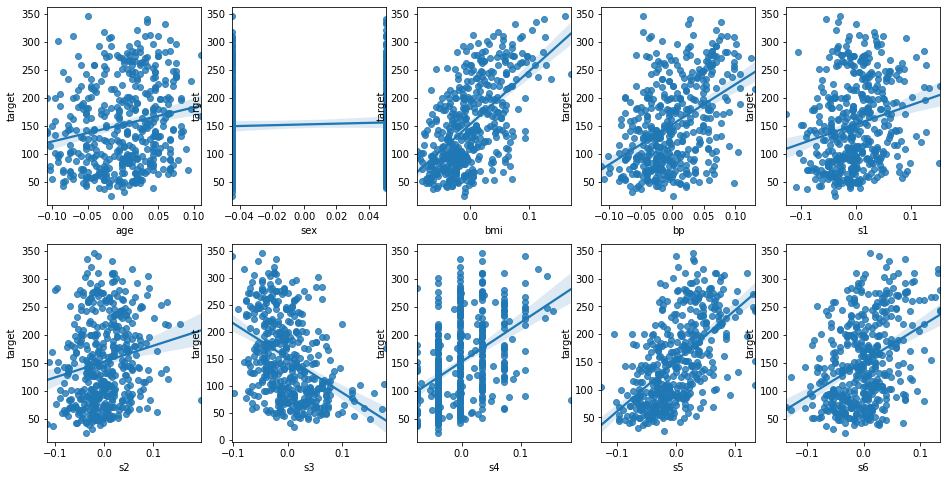

In [7]:
_, axs = plt.subplots(nrows=2, ncols=5, figsize = (16,8))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i//5, i%5
    sns.regplot(x=feature, y = 'target', data = df , ax = axs[row][col])

- 각 피쳐별  R squared value

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
y = diabetes.target
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)  # df[feature]의 형태는 시리즈로 시리즈는 리쉐입이 불가능 하니 넘파이로 변경하여 reshape 작업을 함
    lr =LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature} : {r2:.4f}')

age : 0.0353
sex : 0.0019
bmi : 0.3439
bp : 0.1949
s1 : 0.0450
s2 : 0.0303
s3 : 0.1559
s4 : 0.1853
s5 : 0.3202
s6 : 0.1463


1. LinearRegression


In [43]:
from sklearn.linear_model import LinearRegression
X = df[feature].values.reshape(-1,1)
y = diabetes.target
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.14629361572293453

In [1]:
# - 각 피쳐별  R squared value

In [44]:
y = diabetes.target
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    score = lr.score(X, y)
    print(f'{feature}: \t {score:.4f}')

age: 	 0.0353
sex: 	 0.0019
bmi: 	 0.3439
bp: 	 0.1949
s1: 	 0.0450
s2: 	 0.0303
s3: 	 0.1559
s4: 	 0.1853
s5: 	 0.3202
s6: 	 0.1463


- 다중 선형회귀

In [46]:
# 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
lr.score(X_test, y_test)

0.45584017860891035

In [49]:
# weight, bias
lr.coef_ , lr.intercept_


(array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
        -656.22582592,  364.21134557,   60.28474402,  182.53318837,
         702.08292875,   68.21197298]),
 151.67372554450927)

In [51]:
# predict 예측
pred_lr = lr.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
mse_lr

2370.1978745563174

2. SVR

In [55]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, pred_svr)
mse_svr

3960.9366880199996

3. RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, pred_rfr)
mse_rfr

3824.664311111111

MSE 비교

In [59]:
df = pd.DataFrame({
    'y_test' : y_test, 'LR' : pred_lr, 'SVR' : pred_svr, "rfr" : pred_rfr
})
df.head()

,y_test,LR,SVR,rfr
0,155.0,156.031216,133.705341,111.79
1,167.0,185.700495,146.907788,144.81
2,185.0,162.863840,140.965960,175.52
3,109.0,162.545441,144.683128,154.34
4,65.0,78.518494,118.088552,96.48
